# SENTIMENT_SCORE ALONG WITH STOCK PRICE

In [1]:
#installing pandas datareader

#!pip install pandas-datareader

In [2]:
#!pip install yfinance

In [3]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [4]:
import yfinance as yf

# Define the stock symbol and the date range
symbol = 'AAPL'
start_date = '2021-08-18'
end_date = '2023-07-17'

# Retrieve the stock data from Yahoo Finance
data = yf.download(symbol, start=start_date, end=end_date)


[*********************100%***********************]  1 of 1 completed


In [5]:
# Load the sentiment score data
df_senti_avg = pd.read_csv('Sentiment_score.csv')
df_senti_avg.head()


,publishedAt,score
0,2021-08-18,0.398418
1,2021-08-19,-0.052142
2,2021-08-20,0.258557
3,2021-08-21,0.253870
4,2021-08-22,-0.018721


In [6]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-08-18,149.800003,150.720001,146.149994,146.360001,144.881470,86326000
2021-08-19,145.029999,148.000000,144.500000,146.699997,145.218048,86960300
2021-08-20,147.440002,148.500000,146.779999,148.190002,146.693008,60549600
2021-08-23,148.309998,150.190002,147.889999,149.710007,148.197662,60131800
2021-08-24,149.449997,150.860001,149.149994,149.619995,148.108551,48606400


In [7]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200
2023-07-13,190.500000,191.190002,189.779999,190.539993,190.539993,41342300
2023-07-14,190.229996,191.179993,189.630005,190.690002,190.690002,41573900


<AxesSubplot:xlabel='Date'>

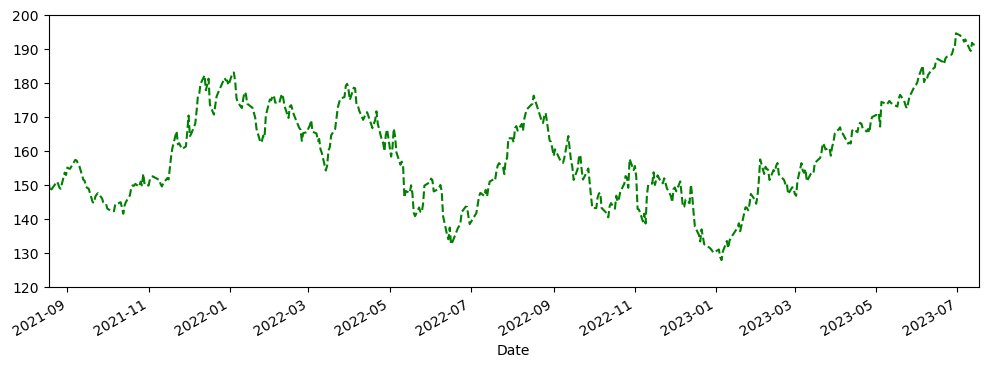

In [8]:
data['High'].plot(xlim=['2021-08-18','2023-07-17'],ylim=[120,200],figsize=(12,4),ls='--',c='green')

In [9]:
index = data.loc['2021-08-18':'2023-07-17'].index
stock_open = data.loc['2021-08-18':'2023-07-17']['Open']
stock_high = data.loc['2021-08-18':'2023-07-17']['High']
stock_low = data.loc['2021-08-18':'2023-07-17']['Low']
stock_close = data.loc['2021-08-18':'2023-07-17']['Close']

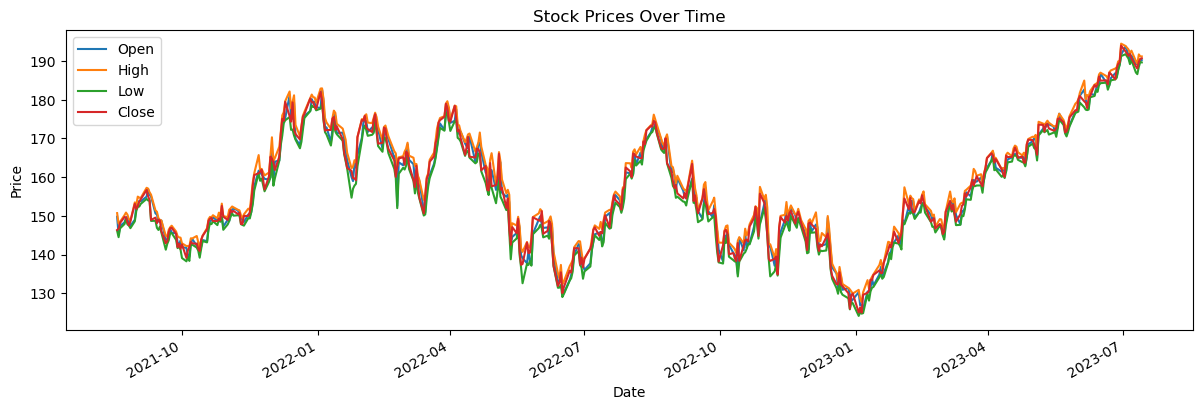

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

figure, axis = plt.subplots(figsize=(12,4))
plt.tight_layout()
# preventing overlapping
figure.autofmt_xdate()

# assuming 'index', 'stock_open', 'stock_high', 'stock_low', 'stock_close' are defined
axis.plot(index, stock_open, label='Open')
axis.plot(index, stock_high, label='High')
axis.plot(index, stock_low, label='Low')
axis.plot(index, stock_close, label='Close')

# Add labels and title
axis.set_xlabel('Date')
axis.set_ylabel('Price')
axis.set_title('Stock Prices Over Time')

# Add a legend
axis.legend()

plt.show()


In [11]:
import pandas as pd

# Assuming you have already performed the necessary data_reset and df_senti_avg operations
# Reset the index and make it a column
data.reset_index(level=0, inplace=True)
df_senti_avg['publishedAt'] = pd.to_datetime(df_senti_avg['publishedAt'])

# Perform the left join operation
merged_df = pd.merge(data, df_senti_avg, how='left', left_on='Date', right_on='publishedAt')
merged_df.set_index('Date', inplace=True)
#merged_df.drop( 'index', axis=1, inplace=True)
merged_df

,Open,High,Low,Close,Adj Close,Volume,publishedAt,score
Date,,,,,,,,
2021-08-18,149.800003,150.720001,146.149994,146.360001,144.881470,86326000,2021-08-18,0.398418
2021-08-19,145.029999,148.000000,144.500000,146.699997,145.218048,86960300,2021-08-19,-0.052142
2021-08-20,147.440002,148.500000,146.779999,148.190002,146.693008,60549600,2021-08-20,0.258557
2021-08-23,148.309998,150.190002,147.889999,149.710007,148.197662,60131800,2021-08-23,0.187540
2021-08-24,149.449997,150.860001,149.149994,149.619995,148.108551,48606400,2021-08-24,0.498763
...,...,...,...,...,...,...,...,...
2023-07-10,189.259995,189.990005,187.039993,188.610001,188.610001,59922200,2023-07-10,0.293409
2023-07-11,189.160004,189.300003,186.600006,188.080002,188.080002,46638100,2023-07-11,0.475714
2023-07-12,189.679993,191.699997,188.470001,189.770004,189.770004,60750200,2023-07-12,0.000000


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = merged_df.corr()
print(corr)

               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.994532  0.994394  0.985436   0.984747 -0.138902   
High       0.994532  1.000000  0.993868  0.993555   0.992620 -0.100386   
Low        0.994394  0.993868  1.000000  0.994057   0.993694 -0.177348   
Close      0.985436  0.993555  0.994057  1.000000   0.999385 -0.137961   
Adj Close  0.984747  0.992620  0.993694  0.999385   1.000000 -0.151376   
Volume    -0.138902 -0.100386 -0.177348 -0.137961  -0.151376  1.000000   
score      0.070517  0.070197  0.072402  0.072011   0.071724 -0.041740   

              score  
Open       0.070517  
High       0.070197  
Low        0.072402  
Close      0.072011  
Adj Close  0.071724  
Volume    -0.041740  
score      1.000000  


In [13]:
senti_open = merged_df[["Open","score"]]
senti_open

,Open,score
Date,,
2021-08-18,149.800003,0.398418
2021-08-19,145.029999,-0.052142
2021-08-20,147.440002,0.258557
2021-08-23,148.309998,0.187540
2021-08-24,149.449997,0.498763
...,...,...
2023-07-10,189.259995,0.293409
2023-07-11,189.160004,0.475714
2023-07-12,189.679993,0.000000


In [14]:
# Calculate the split point
split_point = int(len(senti_open) * 0.8)

# Split the data
train_data = senti_open.iloc[:split_point]
test_data = senti_open.iloc[split_point:]

# Print the shapes of the training and testing sets
print("Training set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)


Training set shape: (383, 2)
Testing set shape: (96, 2)


In [15]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
train_data_scaled=scaler.fit_transform(train_data)
test_data_scaled=scaler.transform(test_data)

In [16]:
train_data_scaled

array([[0.42016955, 0.69379794],
       [0.33592363, 0.33580399],
       [0.37848815, 0.58267041],
       [0.39385366, 0.52624398],
       [0.41398788, 0.77352712],
       [0.42034607, 0.5648515 ],
       [0.39456028, 0.67646793],
       [0.3791945 , 0.37723377],
       [0.40604021, 0.58438735],
       [0.47068174, 0.28401847],
       [0.47368418, 0.27837804],
       [0.49205213, 0.49452171],
       [0.49010934, 0.31197911],
       [0.51148   , 0.29821344],
       [0.54697973, 0.33663457],
       [0.52066411, 0.52672757],
       [0.51200983, 0.40861575],
       [0.43482871, 0.69361817],
       [0.42988348, 0.60902651],
       [0.39826906, 0.50163996],
       [0.39614976, 0.51016145],
       [0.40286125, 0.30542591],
       [0.31419993, 0.67735725],
       [0.31649576, 0.45651427],
       [0.32567986, 0.37723377],
       [0.36453534, 0.37723377],
       [0.34705052, 0.67912008],
       [0.34369477, 0.88728122],
       [0.30448599, 0.45610611],
       [0.29070997, 0.4504763 ],
       [0.

In [17]:
train_data_scaled.shape,test_data_scaled.shape

((383, 2), (96, 2))

In [18]:
def create_sequences(data, window_size):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:(i + window_size)])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)


In [19]:
X_train, y_train = create_sequences(train_data_scaled, window_size=5)
X_test, y_test = create_sequences(test_data_scaled, window_size=5)

In [20]:
X_train.shape,y_train.shape

((378, 5, 2), (378, 2))

In [21]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, BatchNormalization, Conv1D

# Assuming each data point has 5 time steps and 2 features (open and score)
n_steps = 5
n_features = 2
input_shape=(n_steps, n_features)

# Define the model
model = Sequential()

# One-dimensional convolutional layer with 64 filters of size 1 with a stride of 1
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=input_shape))

# LSTM layer with 50 units
model.add(LSTM(100, activation='relu', return_sequences=True))

# LSTM layer with 50 units
model.add(LSTM(100, activation='relu', return_sequences=True))

# Another LSTM layer with 50 units
model.add(LSTM(100, activation='tanh'))

# Dense layer with 64 units and the ReLU activation
model.add(Dense(64, activation='relu'))



# Dense layer with 2 units (for 'Open' and 'Score')
model.add(Dense(2))

# Compile the model
model.compile(optimizer='adam', loss='mse')


In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 64)             192       
                                                                 
 lstm (LSTM)                 (None, 5, 100)            66000     
                                                                 
 lstm_1 (LSTM)               (None, 5, 100)            80400     
                                                                 
 lstm_2 (LSTM)               (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 233,586
Trainable params: 233,586
Non-trai

In [23]:
# Train the model
model.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
12/12 [==============================] - 5s 24ms/step - loss: 0.1843
Epoch 2/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0364
Epoch 3/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0310
Epoch 4/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 5/200
12/12 [==============================] - 0s 12ms/step - loss: 0.0225
Epoch 6/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0192
Epoch 7/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0167
Epoch 8/200
12/12 [==============================] - 0s 13ms/step - loss: 0.0152
Epoch 9/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0149
Epoch 10/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0143
Epoch 11/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0142
Epoch 12/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 13/200
12/12 [=====

12/12 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 102/200
12/12 [==============================] - 0s 10ms/step - loss: 0.0117
Epoch 103/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0115
Epoch 104/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0116
Epoch 105/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0121
Epoch 106/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0118
Epoch 107/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0120
Epoch 108/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0114
Epoch 109/200
12/12 [==============================] - 0s 11ms/step - loss: 0.0118
Epoch 110/200
12/12 [==============================] - 0s 15ms/step - loss: 0.0124
Epoch 111/200
12/12 [==============================] - 0s 17ms/step - loss: 0.0124
Epoch 112/200
12/12 [==============================] - 0s 14ms/step - loss: 0.0121
Epoch 113/200
12/1

12/12 [==============================] - 0s 15ms/step - loss: 0.0108
Epoch 200/200
12/12 [==============================] - 0s 16ms/step - loss: 0.0107


In [24]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

3/3 [==============================] - 0s 9ms/step


In [25]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [26]:
train_predict

array([[1.50002365e+02, 1.13013424e-01],
       [1.49343704e+02, 1.10865101e-01],
       [1.48568512e+02, 1.23902358e-01],
       [1.48195023e+02, 1.27363250e-01],
       [1.50171967e+02, 1.17510900e-01],
       [1.52784119e+02, 1.24181531e-01],
       [1.51516541e+02, 1.29945129e-01],
       [1.51917770e+02, 8.91372338e-02],
       [1.52534073e+02, 9.17335972e-02],
       [1.52685715e+02, 7.64479414e-02],
       [1.54546494e+02, 7.76347369e-02],
       [1.54635696e+02, 8.12436864e-02],
       [1.53610809e+02, 7.86134452e-02],
       [1.50614822e+02, 9.00973752e-02],
       [1.51331711e+02, 9.78806540e-02],
       [1.49236862e+02, 1.07154399e-01],
       [1.49072632e+02, 1.05861709e-01],
       [1.49253220e+02, 1.20701879e-01],
       [1.43853973e+02, 1.05554707e-01],
       [1.44787689e+02, 9.27487612e-02],
       [1.44552933e+02, 9.31195319e-02],
       [1.45902725e+02, 9.38927308e-02],
       [1.45851685e+02, 1.12154707e-01],
       [1.45024292e+02, 1.06381655e-01],
       [1.432588

In [27]:
train_predict.shape,test_predict.shape

((378, 2), (91, 2))

In [28]:
train_data_campare =train_data[n_steps:]
test_data_campare = test_data[n_steps:]
train_data_campare.shape,test_data_campare.shape

((378, 2), (91, 2))

In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error

print(f"The RMSE for train is {math.sqrt(mean_squared_error(train_data_campare, train_predict))}")
print(f"The RMSE for test is {math.sqrt(mean_squared_error(test_data_campare, test_predict))}")

The RMSE for train is 2.0336887039157716
The RMSE for test is 2.373852466426053


In [30]:
# Assuming `test_data_scaled` is your time series data and `model` is your trained model
window_size=n_steps
input_seq = test_data_scaled[-n_steps:]

for _ in range(window_size):
    # Reshape the input sequence
    input_seq = input_seq.reshape((1, n_steps, n_features))

    # Make a prediction
    prediction = model.predict(input_seq)

    # Update the input sequence
    input_seq = np.concatenate((input_seq[:, 1:, :], prediction.reshape(1, 1, n_features)), axis=1)

# `input_seq` now contains the original data for the last `n_steps` time steps followed by `window_size` forecasted time steps


1/1 [==============================] - 0s 28ms/step


In [31]:
input_seq

array([[[1.01725006, 0.52171457],
        [0.94143653, 0.55036581],
        [0.86023778, 0.48970187],
        [0.82158345, 0.46711871],
        [0.79334486, 0.45754683]]])

In [32]:
# Reshape the input sequence to 2D
input_seq_2d = input_seq.reshape(-1, n_features)

# Apply inverse transformation
future_predict = scaler.inverse_transform(input_seq_2d)

future_predict

array([[1.83606703e+02, 1.81839288e-01],
       [1.79314141e+02, 2.17898894e-01],
       [1.74716667e+02, 1.41549043e-01],
       [1.72528059e+02, 1.13126545e-01],
       [1.70929190e+02, 1.01079658e-01]])

In [33]:
train_predict.shape,future_predict.shape,test_predict.shape

((378, 2), (5, 2), (91, 2))

In [34]:
def extract_first_column(data):
    return data[:, 0].tolist()
train_predict_senti = extract_first_column(train_predict)
test_predict_senti = extract_first_column(test_predict)
future_predict_senti = extract_first_column(future_predict)


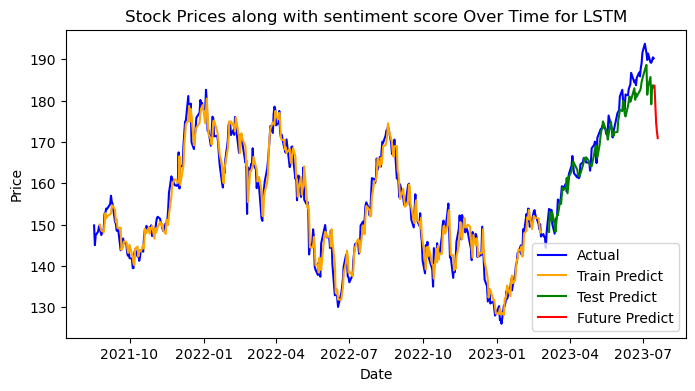

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'dates', 'stock_open', 'train_predict_senti', 'test_predict_senti', 'future_predict_senti' are defined
dates = np.array(index)
stock_open = np.array(stock_open)
train_predict_senti = np.array(train_predict_senti).flatten()
test_predict_senti = np.array(test_predict_senti).flatten()

# Create empty arrays for the plot
trainPredictPlot = np.empty_like(stock_open)
trainPredictPlot[:] = np.nan
trainPredictPlot[n_steps:len(train_predict_senti)+n_steps] = train_predict_senti

testPredictPlot = np.empty_like(stock_open)
testPredictPlot[:] = np.nan
testPredictPlot[len(train_predict_senti)+(n_steps*2):len(train_predict_senti)+(n_steps*2)+len(test_predict_senti)] = test_predict_senti

# Flatten future_predict_senti
future_predict_senti = np.array(future_predict_senti).flatten()

# Create an array for the future prediction dates
future_dates = np.arange(dates[-1] + np.timedelta64(1, 'D'), dates[-1] + np.timedelta64(window_size + 1, 'D'), np.timedelta64(1, 'D'))

# Create an array for the plot
futurePredictPlot = np.empty_like(np.concatenate((stock_open, np.full(window_size, np.nan))))
futurePredictPlot[:] = np.nan
futurePredictPlot[len(train_predict_senti) + (n_steps * 2) + len(test_predict_senti):] = future_predict_senti

# Plotting
plt.figure(figsize=(8,4))
plt.plot(np.concatenate((dates, future_dates)), np.concatenate((stock_open, np.full(window_size, np.nan))), color='blue', label='Actual')
plt.plot(dates, trainPredictPlot, color='orange', label='Train Predict')
plt.plot(dates, testPredictPlot, color='green', label='Test Predict')
plt.plot(np.concatenate((dates, future_dates)), futurePredictPlot, color='red', label='Future Predict')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices along with sentiment score Over Time for LSTM')
plt.legend()
plt.show()


In [36]:
future_predict_senti

array([183.60670339, 179.314141  , 174.71666745, 172.52805932,
       170.92919002])

In [38]:
import yfinance as yf

# Define the stock symbol and the date range
symbol = 'AAPL'
start_date = '2023-07-17'
end_date = '2023-07-25'

# Retrieve the stock data from Yahoo Finance
data_ = yf.download(symbol, start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


In [40]:
data_.Open

Date
2023-07-17    191.899994
2023-07-18    193.350006
2023-07-19    193.100006
2023-07-20    195.089996
2023-07-21    194.100006
Name: Open, dtype: float64